In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("tracks.csv")
data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [44]:
data.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [45]:
data = data.dropna(subset=['name'])
data.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [46]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586600.000000,5.866000e+05,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000,586600.000000
mean,27.573227,2.300548e+05,0.044091,0.563612,0.542071,5.221599,-10.205798,0.658796,0.104870,0.449803,0.113425,0.213933,0.552306,118.467890,3.873409
std,18.369429,1.265329e+05,0.205298,0.166102,0.251910,3.519420,5.089422,0.474114,0.179903,0.348812,0.266843,0.184328,0.257673,29.762952,0.473112
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


Correlación

<Axes: >

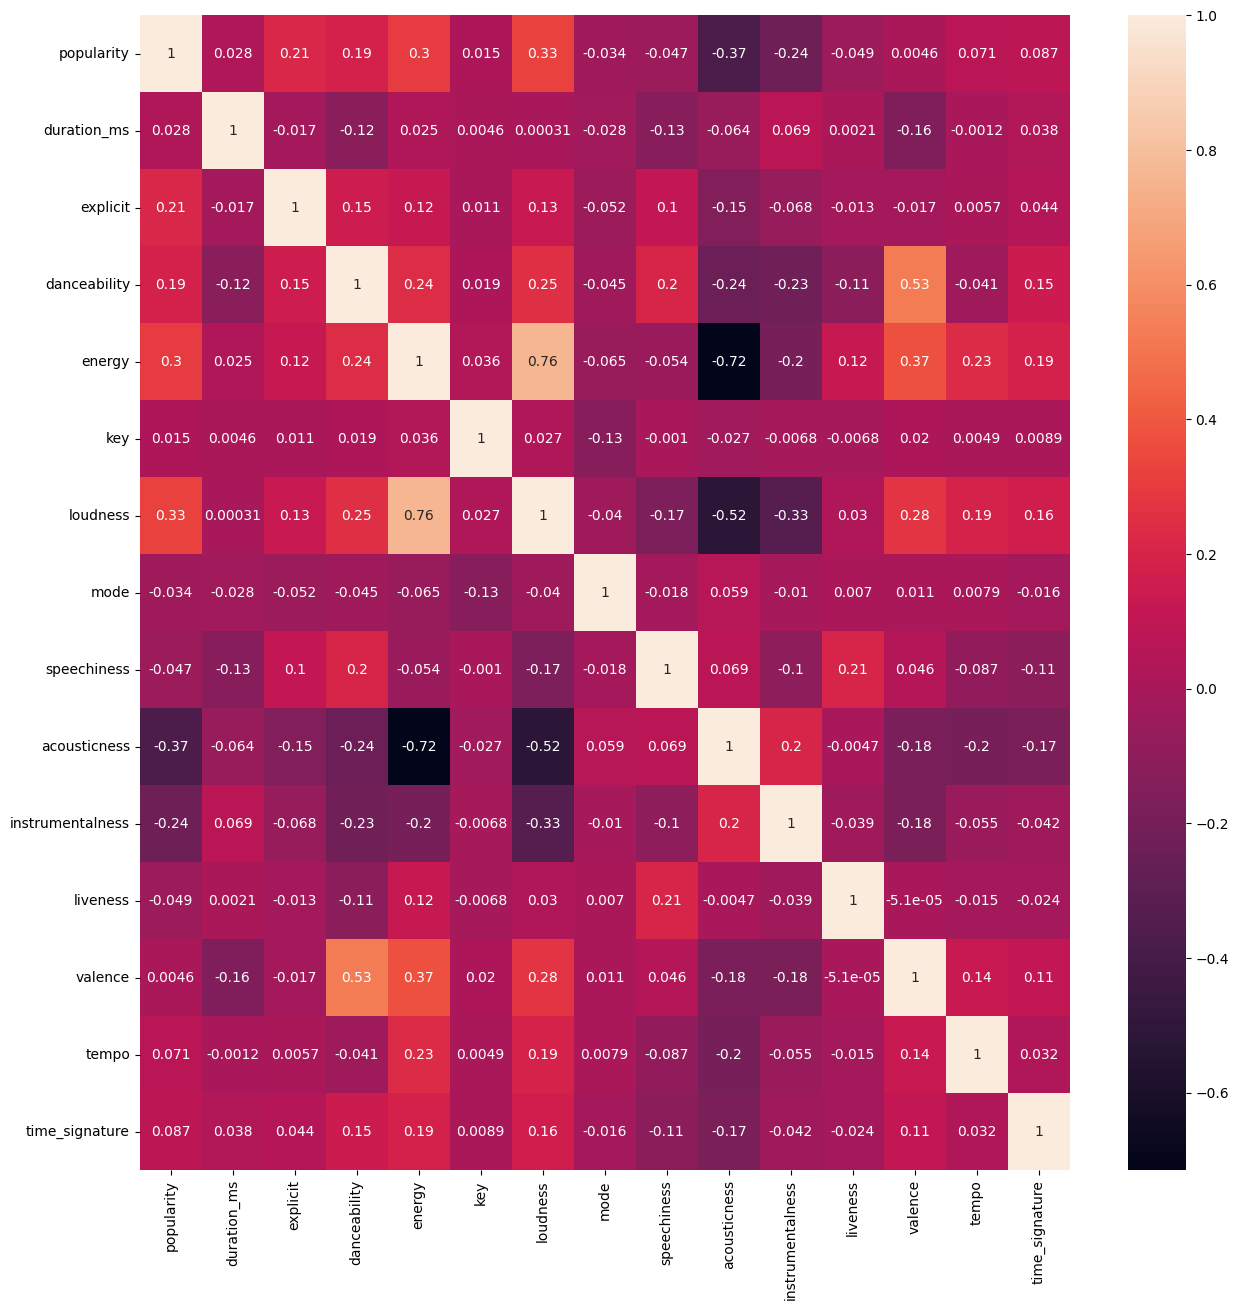

In [47]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize = (15, 15))
sns.heatmap(numeric_data.corr(), annot=True)

Canciones más Populares

In [48]:
popularity = data.copy().sort_values(by=["popularity"], ascending=False)[["popularity","name","artists"]]
popularity

,popularity,name,artists
93802,100,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']"
93803,99,drivers license,['Olivia Rodrigo']
93804,98,Astronaut In The Ocean,['Masked Wolf']
92811,97,telepatía,['Kali Uchis']
92810,97,Save Your Tears,['The Weeknd']
...,...,...,...
511195,0,Chale Kyon Na Meri Naiya,['Bashir Qawal']
511194,0,Sansar Ho Prem Ka Mandir,['Bibbo']
315090,0,"Brennið þið, vitar","['Páll Ísólfsson', 'Karlakórinn Fóstbræður', '..."
315087,0,Morgunn í maí,['Guðmundur Jónsson']


Más populares por año

In [50]:
# Crear la columna 'year' como en el ejemplo anterior
data['year'] = data['release_date'].str.extract(r'(\d{4})')

# Filtrar las filas donde 'year' sea un valor numérico y eliminar las filas inválidas
data = data[data['year'].str.isnumeric()]

# Convertir la columna 'year' a tipo numérico
data['year'] = data['year'].astype(int)

numeric_data = data.select_dtypes(include=[np.number])

# Realizar la operación de agregación
por_anio = numeric_data.groupby(by="year").mean()
por_anio

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
year,,,,,,,,,,,,,,,
1922,0.057971,165202.184783,0.000000,0.541207,0.329083,4.833333,-14.073036,0.739130,0.258699,0.892674,0.328275,0.246547,0.572387,110.133703,3.717391
1923,1.575342,156975.914764,0.001522,0.637332,0.266977,3.651446,-16.351921,0.797565,0.552072,0.859965,0.157659,0.225396,0.671967,109.552648,3.662100
1924,0.612954,189111.306477,0.001580,0.593344,0.356725,4.723539,-13.290367,0.693523,0.375208,0.866266,0.339628,0.203447,0.554935,119.457894,3.753555
1925,1.414175,189370.960133,0.000000,0.617391,0.263749,5.069767,-14.977595,0.764120,0.305693,0.912170,0.275384,0.255157,0.635196,113.901050,3.760797
1926,1.938776,165946.540464,0.000000,0.622113,0.263075,5.746657,-15.929906,0.705841,0.356952,0.785739,0.323416,0.211447,0.539702,113.386792,3.813512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,42.236222,229758.453433,0.170998,0.624972,0.659730,5.378805,-7.215648,0.583274,0.100517,0.278547,0.089228,0.200736,0.493965,121.335623,3.934473
2018,42.139539,220775.361558,0.189923,0.634510,0.652202,5.371617,-7.390117,0.566843,0.108212,0.278446,0.098398,0.198216,0.483251,121.684055,3.941020
2019,44.920551,216802.352650,0.214916,0.649724,0.637066,5.369615,-7.434020,0.567565,0.111168,0.293902,0.081428,0.189971,0.494212,122.023748,3.943563


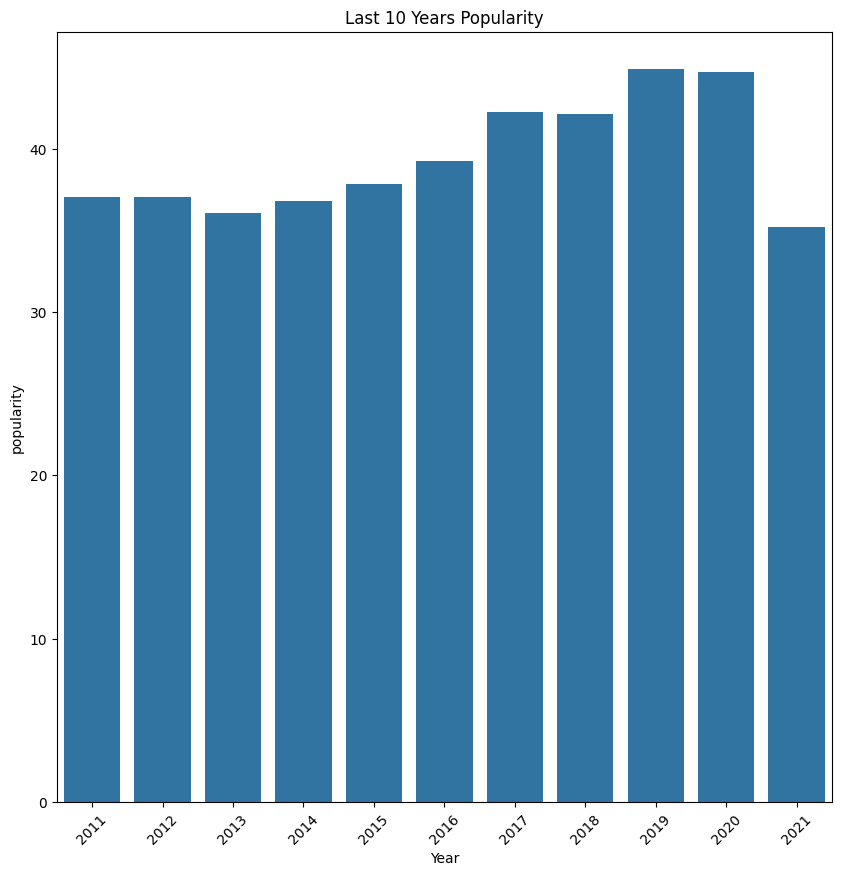

In [53]:
por_anio = por_anio.loc[por_anio.index > 2010]
plt.figure(figsize=(10,10))
sns.barplot(x=por_anio.index, y=por_anio["popularity"])
plt.xticks(rotation = 45)
plt.xlabel("Year")
plt.ylabel("popularity")
plt.title("Last 10 Years Popularity")
plt.show()


Artistas más populares

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, "['Die drei ???']"),
  Text(1, 0, "['TKKG Retro-Archiv']"),
  Text(2, 0, "['Bibi Blocksberg']"),
  Text(3, 0, "['Benjamin Blümchen']"),
  Text(4, 0, "['Bibi und Tina']"),
  Text(5, 0, "['Queen']"),
  Text(6, 0, "['Fünf Freunde']"),
  Text(7, 0, "['Taylor Swift']"),
  Text(8, 0, "['Elvis Presley']"),
  Text(9, 0, "['Pink Floyd']"),
  Text(10, 0, "['The Rolling Stones']"),
  Text(11, 0, "['The Beatles']"),
  Text(12, 0, "['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']"),
  Text(13, 0, "['Fleetwood Mac']"),
  Text(14, 0, "['Frank Sinatra']"),
  Text(15, 0, "['Julio Iglesias']"),
  Text(16, 0, "['Metallica']"),
  Text(17, 0, "['Luis Miguel']"),
  Text(18, 0, "['BTS']"),
  Text(19, 0, "['Bob Dylan']")])

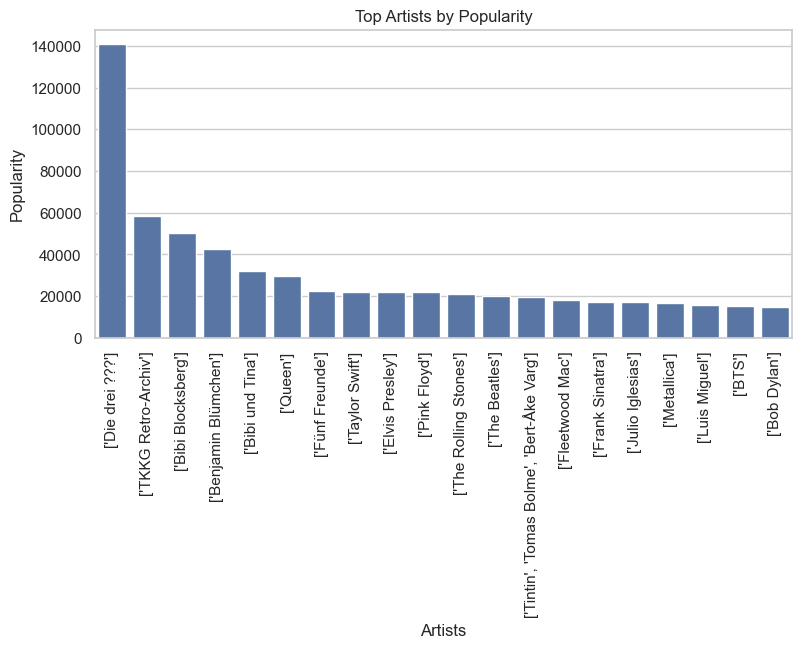

In [60]:
plt.figure(figsize=(9,4))
sns.set(style="whitegrid")
x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x)
ax.set_title("Top Artists by Popularity")
ax.set_ylabel("Popularity")
ax.set_xlabel("Artists")
plt.xticks(rotation = 90)

10 artistas con más canciones

In [61]:
data["artists"].value_counts().head(10)

artists
['Die drei ???']                              3856
['TKKG Retro-Archiv']                         2006
['Benjamin Blümchen']                         1503
['Bibi Blocksberg']                           1472
['Lata Mangeshkar']                           1373
['Bibi und Tina']                              927
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     905
['Francisco Canaro']                           891
['Ella Fitzgerald']                            870
['Tadeusz Dolega Mostowicz']                   838
Name: count, dtype: int64